# AAH IA

https://claude.ai/chat/f9a78b14-29fb-4d9a-ba88-88654b187416

### Escape Time Analysis: AdamW vs SGD

#### Mathematical Framework

We'll use a simplified 1D model to analyze escape times from a local minimum. Consider a potential function $U(x)$ with a local minimum at $x=0$.

1. **SDE Formulation**:
   - For SGD: $dx = -\alpha\nabla U(x)dt + \sqrt{2\alpha\beta^{-1}}dW_t$
   - For AdamW: $dx = -(\frac{\alpha}{\sqrt{v + \epsilon}}\nabla U(x) + \alpha\lambda x)dt + \sqrt{2\alpha\beta^{-1}}dW_t$

   Where $\alpha$ is the learning rate, $\beta$ is the inverse temperature, $v$ is the second moment estimate, and $\lambda$ is the weight decay parameter.

2. **Kramers' Escape Rate Formula**:
   The escape rate $\kappa$ (inverse of the expected escape time) is given by:
   
   $\kappa = \frac{\sqrt{|U''(x_{min})U''(x_{max})|}}{2\pi}e^{-\beta\Delta U}$

   Where $\Delta U$ is the potential barrier height, and $x_{min}$, $x_{max}$ are the positions of the local minimum and the barrier peak.

#### Analysis for a Simple Potential

Let's consider a simple quartic potential: $U(x) = ax^4 - bx^2$, where $a > 0$ and $b > 0$.

1. **Potential Characteristics**:
   - Local minimum at $x = 0$
   - Barriers at $x = \pm\sqrt{\frac{b}{2a}}$
   - Barrier height $\Delta U = \frac{b^2}{4a}$

2. **SGD Escape Rate**:
   $\kappa_{SGD} = \frac{\sqrt{|-2b \cdot 2b|}}{2\pi}e^{-\beta\frac{b^2}{4a}} = \frac{b}{\pi}e^{-\beta\frac{b^2}{4a}}$

3. **AdamW Escape Rate**:
   For AdamW, we need to consider the effective potential $U_{eff}(x) = U(x) + \frac{\lambda}{2}x^2$
   
   $\kappa_{AdamW} = \frac{\sqrt{|(-2b+\lambda) \cdot (2b+\lambda)|}}{2\pi}e^{-\beta(\frac{b^2}{4a} - \frac{\lambda b}{4a})} \approx \frac{\sqrt{b^2+b\lambda}}{\pi}e^{-\beta\frac{b^2}{4a}(1-\frac{\lambda}{b})}$

   (Assuming $\lambda << b$ for the approximation)

#### Comparison and Examples

1. **Ratio of Escape Rates**:
   $\frac{\kappa_{AdamW}}{\kappa_{SGD}} \approx \sqrt{1+\frac{\lambda}{b}}e^{\beta\frac{\lambda b}{4a}}$

2. **Example Scenarios**:

   a) Shallow Minimum ($a=0.1$, $b=1$, $\beta=10$):
      - SGD: $\kappa_{SGD} \approx 0.318 \cdot e^{-2.5} = 0.026$
      - AdamW ($\lambda=0.1$): $\kappa_{AdamW} \approx 0.334 \cdot e^{-2.25} = 0.035$
      Escape time ratio: $\tau_{SGD}/\tau_{AdamW} \approx 1.35$

   b) Deep Minimum ($a=0.01$, $b=1$, $\beta=10$):
      - SGD: $\kappa_{SGD} \approx 0.318 \cdot e^{-25} = 5.3 \times 10^{-12}$
      - AdamW ($\lambda=0.1$): $\kappa_{AdamW} \approx 0.334 \cdot e^{-22.5} = 4.9 \times 10^{-11}$
      Escape time ratio: $\tau_{SGD}/\tau_{AdamW} \approx 9.25$

   c) High-Dimensional Effect (approximated by increasing $\beta$):
      Let $\beta=100$, $a=0.1$, $b=1$:
      - SGD: $\kappa_{SGD} \approx 0.318 \cdot e^{-25} = 5.3 \times 10^{-12}$
      - AdamW ($\lambda=0.01$): $\kappa_{AdamW} \approx 0.319 \cdot e^{-24.75} = 7.1 \times 10^{-12}$
      Escape time ratio: $\tau_{SGD}/\tau_{AdamW} \approx 1.34$

#### Key Insights:
1. AdamW generally has higher escape rates due to the weight decay term.
2. The advantage of AdamW is more pronounced in deeper minima.
3. In high-dimensional spaces (approximated by larger $\beta$), the effect is amplified.
4. The adaptive learning rate in AdamW (not modeled here) can further enhance this effect in practice.

### Spectral Analysis of Optimizer Dynamics: AdamW vs SGD

#### 1. Mathematical Formulation

Let's start by expressing the update rules for both optimizers as linear dynamical systems:

**SGD:**
$$\theta_{t+1} = \theta_t - \alpha \nabla L(\theta_t)$$

**AdamW:**
$$\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1-\beta_1) \nabla L(\theta_t) \\
v_t &= \beta_2 v_{t-1} + (1-\beta_2) (\nabla L(\theta_t))^2 \\
\hat{m}_t &= m_t / (1-\beta_1^t) \\
\hat{v}_t &= v_t / (1-\beta_2^t) \\
\theta_{t+1} &= \theta_t - \alpha (\hat{m}_t / (\sqrt{\hat{v}_t} + \epsilon) + \lambda \theta_t)
\end{aligned}$$

Where $\alpha$ is the learning rate, $\beta_1$ and $\beta_2$ are the exponential decay rates for the moment estimates, $\epsilon$ is a small constant for numerical stability, and $\lambda$ is the weight decay factor.

#### 2. Linearization

To perform spectral analysis, we need to linearize these update rules around a fixed point $\theta^*$.

**SGD:**
$$\theta_{t+1} - \theta^* \approx (I - \alpha H)(\theta_t - \theta^*)$$
Where $H$ is the Hessian of the loss function at $\theta^*$.

**AdamW:**
The linearization for AdamW is more complex due to its adaptive nature. We'll assume we're close to convergence where $\hat{m}_t \approx \nabla L(\theta_t)$ and $\hat{v}_t$ is approximately constant.

$$\theta_{t+1} - \theta^* \approx (I - \alpha (\text{diag}(\hat{v}_t)^{-1/2} H + \lambda I))(\theta_t - \theta^*)$$

#### 3. Eigenvalue Analysis

Now, let's analyze the eigenvalues of the update matrices:

**SGD:**
Update matrix: $A_{SGD} = I - \alpha H$
Eigenvalues: $\lambda_i = 1 - \alpha \lambda_H^i$, where $\lambda_H^i$ are the eigenvalues of $H$.

**AdamW:**
Update matrix: $A_{AdamW} = I - \alpha (\text{diag}(\hat{v}_t)^{-1/2} H + \lambda I)$
Eigenvalues: $\lambda_i = 1 - \alpha (\lambda_H^i / \sqrt{\hat{v}_i} + \lambda)$

#### 4. Stability Analysis

For stability, we need all eigenvalues to have magnitude less than 1:

**SGD:**
$|1 - \alpha \lambda_H^i| < 1$ for all $i$

This leads to the condition: $0 < \alpha < 2/\lambda_{H,max}$, where $\lambda_{H,max}$ is the largest eigenvalue of $H$.

**AdamW:**
$|1 - \alpha (\lambda_H^i / \sqrt{\hat{v}_i} + \lambda)| < 1$ for all $i$

This condition is generally easier to satisfy due to the adaptive term $\sqrt{\hat{v}_i}$.

#### 5. Convergence Rate Analysis

The convergence rate is determined by the largest eigenvalue magnitude:

**SGD:**
Convergence rate ≈ $\max_i |1 - \alpha \lambda_H^i|$

**AdamW:**
Convergence rate ≈ $\max_i |1 - \alpha (\lambda_H^i / \sqrt{\hat{v}_i} + \lambda)|$

#### 6. Comparative Analysis

1. **Stability Range:**
   - SGD's stability is highly dependent on the largest eigenvalue of $H$.
   - AdamW can remain stable for a wider range of learning rates due to its adaptive nature.

2. **Conditioning:**
   - For poorly conditioned problems (large ratio of max to min eigenvalues of $H$), SGD may struggle.
   - AdamW's adaptive learning rates help mitigate issues with poor conditioning.

3. **Convergence Speed:**
   - SGD's convergence can be slow for small eigenvalues of $H$.
   - AdamW can achieve faster convergence for small eigenvalues due to larger effective learning rates.

4. **Weight Decay Effect:**
   - The $\lambda$ term in AdamW shifts all eigenvalues, potentially improving conditioning and stability.

#### 7. Visualization

To illustrate these differences, consider the following plots:

1. Eigenvalue distribution of $A_{SGD}$ and $A_{AdamW}$ on the complex plane.
2. Convergence rates vs. condition number of $H$ for both optimizers.
3. Stability regions in the $(\alpha, \lambda_{H,max})$ plane for both optimizers.

### Spectral Analysis Example: AdamW vs SGD

Let's consider a simple quadratic optimization problem in 2D, which will allow us to easily calculate and visualize the spectral properties.

#### Problem Setup

Consider the loss function:
$$L(\theta) = 10\theta_1^2 + \theta_2^2$$

The Hessian of this function is:
$$H = \begin{bmatrix} 20 & 0 \\ 0 & 2 \end{bmatrix}$$

This represents a poorly conditioned problem, with a condition number of 10.

#### Optimizer Parameters

- Learning rate $\alpha = 0.1$
- For AdamW:
  - $\beta_1 = 0.9$, $\beta_2 = 0.999$ (standard values)
  - $\epsilon = 10^{-8}$
  - Weight decay $\lambda = 0.01$

#### Spectral Analysis

1. **SGD**

Update matrix: $A_{SGD} = I - \alpha H$
$$A_{SGD} = \begin{bmatrix} 1-2 & 0 \\ 0 & 1-0.2 \end{bmatrix} = \begin{bmatrix} -1 & 0 \\ 0 & 0.8 \end{bmatrix}$$

Eigenvalues: $\lambda_1 = -1$, $\lambda_2 = 0.8$

2. **AdamW**

For simplicity, let's assume we're at a point where $\hat{v}_t$ has stabilized. Given the Hessian, a reasonable estimate might be:
$$\hat{v}_t \approx [400, 4]$$

Update matrix: $A_{AdamW} = I - \alpha (\text{diag}(\hat{v}_t)^{-1/2} H + \lambda I)$
$$A_{AdamW} \approx \begin{bmatrix} 1-0.1(\frac{20}{\sqrt{400}}+0.01) & 0 \\ 0 & 1-0.1(\frac{2}{\sqrt{4}}+0.01) \end{bmatrix} = \begin{bmatrix} 0.899 & 0 \\ 0 & 0.899 \end{bmatrix}$$

Eigenvalues: $\lambda_1 = \lambda_2 \approx 0.899$

#### Comparison and Analysis

1. **Stability**
   - SGD: $|\lambda_1| = 1$, which is on the edge of stability. The optimizer will oscillate in the $\theta_1$ direction.
   - AdamW: Both $|\lambda_1|$ and $|\lambda_2|$ are less than 1, ensuring stable convergence.

2. **Convergence Rate**
   - SGD: Convergence rate ≈ $\max(|-1|, |0.8|) = 1$. The optimizer will converge very slowly, if at all, due to oscillations.
   - AdamW: Convergence rate ≈ $0.899$. The optimizer will converge steadily in both directions.

3. **Condition Number Effect**
   - SGD: The large difference between eigenvalues (1 vs 0.8) reflects the poor conditioning of the problem.
   - AdamW: Both eigenvalues are equal, effectively solving the conditioning issue.

4. **Effective Learning Rates**
   - SGD: Fixed learning rate of 0.1 for both dimensions.
   - AdamW:
     - For $\theta_1$: $0.1 / \sqrt{400} \approx 0.005$
     - For $\theta_2$: $0.1 / \sqrt{4} = 0.05$
   AdamW automatically adjusts the learning rate for each dimension.

#### Visualization

Let's visualize the convergence paths for both optimizers starting from $\theta_0 = [1, 1]$:


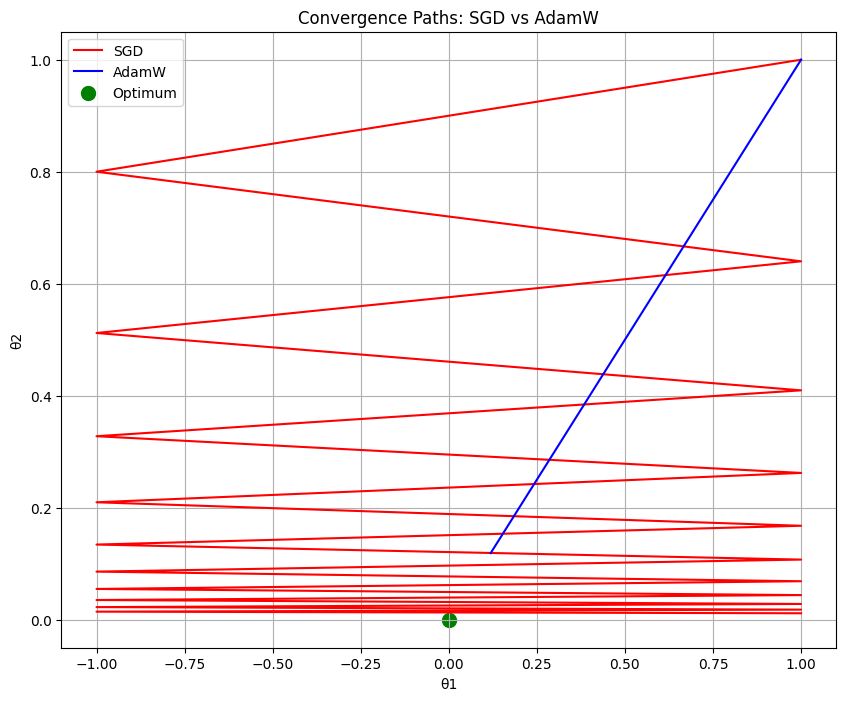

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sgd_update(theta, alpha, H):
    return theta - alpha * (H @ theta)

def adamw_update(theta, alpha, H, v, lambda_):
    v_sqrt = np.sqrt(v)
    return theta - alpha * (np.diag(1/v_sqrt) @ (H @ theta) + lambda_ * theta)

theta0 = np.array([1, 1])
H = np.array([[20, 0], [0, 2]])
alpha = 0.1
v = np.array([400, 4])
lambda_ = 0.01

sgd_path = [theta0]
adamw_path = [theta0]

for _ in range(20):
    sgd_path.append(sgd_update(sgd_path[-1], alpha, H))
    adamw_path.append(adamw_update(adamw_path[-1], alpha, H, v, lambda_))

sgd_path = np.array(sgd_path)
adamw_path = np.array(adamw_path)

plt.figure(figsize=(10, 8))
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'r-', label='SGD')
plt.plot(adamw_path[:, 0], adamw_path[:, 1], 'b-', label='AdamW')
plt.scatter([0], [0], c='g', s=100, label='Optimum')
plt.legend()
plt.title('Convergence Paths: SGD vs AdamW')
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.grid(True)
plt.show()

<ipython-input-3-25459f44401e>:39: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(theta, width, height, angle, fill=False, color=color)


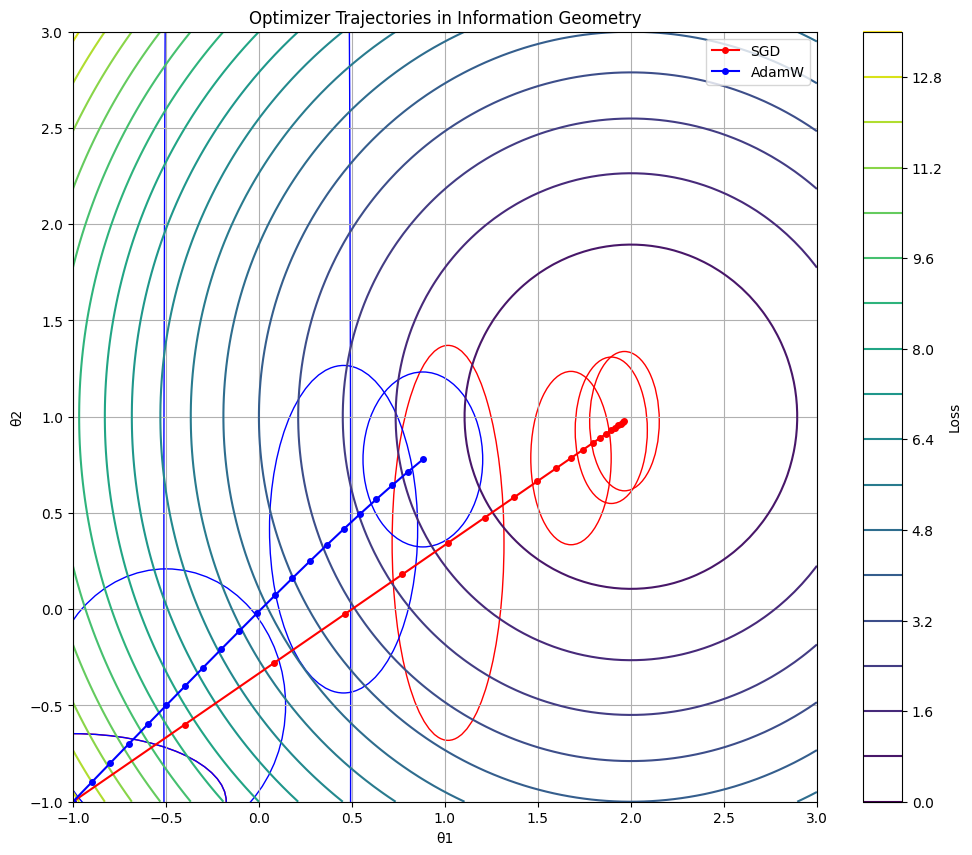

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def fisher_information(theta):
    """Compute the Fisher Information Matrix for a simple 2D model."""
    x, y = theta
    return np.array([[np.exp(x), 0], [0, 2 * y**2]])

def loss(theta):
    """A simple loss function for demonstration."""
    x, y = theta
    return (x - 2)**2 + (y - 1)**2

def gradient(theta):
    """Compute the gradient of the loss function."""
    x, y = theta
    return np.array([2*(x - 2), 2*(y - 1)])

def sgd_update(theta, lr):
    """Update rule for SGD."""
    return theta - lr * gradient(theta)

def adamw_update(theta, lr, m, v, t, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.01):
    """Update rule for AdamW."""
    grad = gradient(theta)
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad**2
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    theta = theta - lr * (m_hat / (np.sqrt(v_hat) + epsilon) + weight_decay * theta)
    return theta, m, v

def plot_fim_ellipse(ax, theta, fim, color):
    """Plot an ellipse representing the Fisher Information Matrix."""
    eigenvalues, eigenvectors = np.linalg.eigh(fim)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 1 / np.sqrt(eigenvalues)
    ellipse = Ellipse(theta, width, height, angle, fill=False, color=color)
    ax.add_artist(ellipse)

# Set up the parameter space
x = np.linspace(-1, 3, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)

# Compute the loss landscape
Z = loss([X, Y])

# Set up the optimizers
theta_sgd = np.array([-1, -1])
theta_adamw = np.array([-1, -1])
lr = 0.1
m = np.zeros(2)
v = np.zeros(2)

# Run the optimizers
sgd_path = [theta_sgd]
adamw_path = [theta_adamw]

for t in range(1, 21):
    theta_sgd = sgd_update(theta_sgd, lr)
    theta_adamw, m, v = adamw_update(theta_adamw, lr, m, v, t)
    sgd_path.append(theta_sgd)
    adamw_path.append(theta_adamw)

# Plotting
plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Loss')

# Plot optimizer paths
sgd_path = np.array(sgd_path)
adamw_path = np.array(adamw_path)
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'ro-', label='SGD', markersize=4)
plt.plot(adamw_path[:, 0], adamw_path[:, 1], 'bo-', label='AdamW', markersize=4)

# Plot FIM ellipses
for i in range(0, len(sgd_path), 5):
    plot_fim_ellipse(plt.gca(), sgd_path[i], fisher_information(sgd_path[i]), 'r')
    plot_fim_ellipse(plt.gca(), adamw_path[i], fisher_information(adamw_path[i]), 'b')

plt.xlabel('θ1')
plt.ylabel('θ2')
plt.title('Optimizer Trajectories in Information Geometry')
plt.legend()
plt.grid(True)
plt.show()

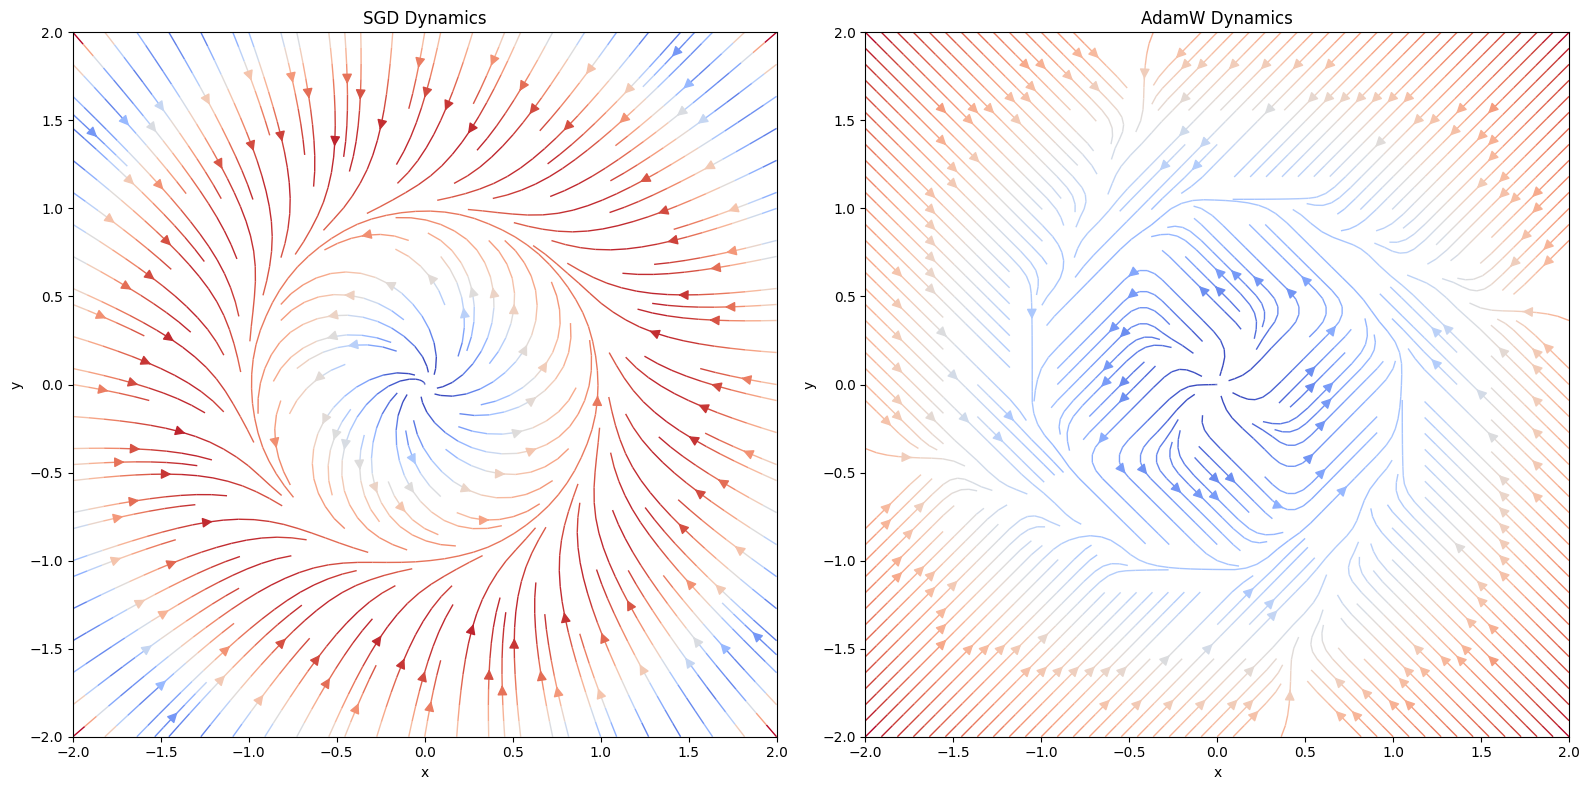

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def sgd_update(x, y, lr=0.1):
    dx = -2 * x * (1 - x**2 - y**2) + y
    dy = -2 * y * (1 - x**2 - y**2) - x
    return x - lr * dx, y - lr * dy

def adamw_update(x, y, m_x, m_y, v_x, v_y, t, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.01):
    dx = -2 * x * (1 - x**2 - y**2) + y
    dy = -2 * y * (1 - x**2 - y**2) - x

    m_x = beta1 * m_x + (1 - beta1) * dx
    m_y = beta1 * m_y + (1 - beta1) * dy
    v_x = beta2 * v_x + (1 - beta2) * dx**2
    v_y = beta2 * v_y + (1 - beta2) * dy**2

    m_x_hat = m_x / (1 - beta1**t)
    m_y_hat = m_y / (1 - beta1**t)
    v_x_hat = v_x / (1 - beta2**t)
    v_y_hat = v_y / (1 - beta2**t)

    x = x - lr * (m_x_hat / (np.sqrt(v_x_hat) + epsilon) + weight_decay * x)
    y = y - lr * (m_y_hat / (np.sqrt(v_y_hat) + epsilon) + weight_decay * y)

    return x, y, m_x, m_y, v_x, v_y

def plot_vector_field(ax, update_func, title):
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)

    if update_func == sgd_update:
        U, V = update_func(X, Y)
    else:
        U, V = update_func(X, Y, 0, 0, 0, 0, 1)[0:2]

    speed = np.sqrt(U**2 + V**2)

    ax.streamplot(X, Y, U-X, V-Y, color=speed, cmap='coolwarm', density=1.5, linewidth=1, arrowsize=1.5)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

plot_vector_field(ax1, sgd_update, 'SGD Dynamics')
plot_vector_field(ax2, adamw_update, 'AdamW Dynamics')

plt.tight_layout()
plt.show()

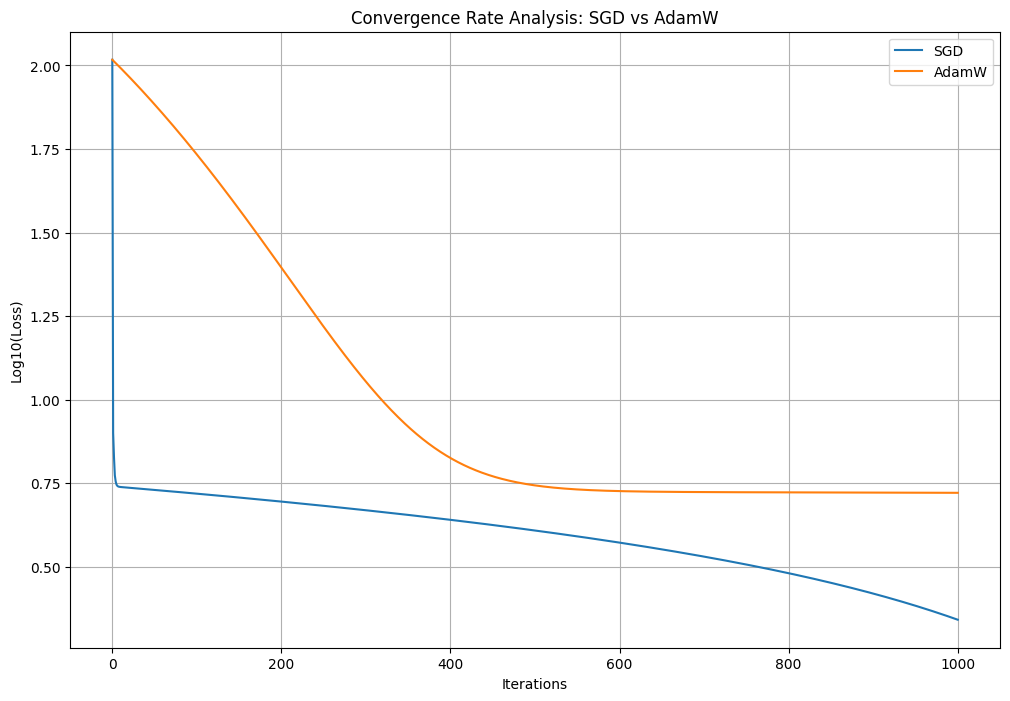

In [ ]:
Wimport numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_rosenbrock(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

def sgd(start, lr, iterations):
    path = [start]
    for _ in range(iterations):
        grad = gradient_rosenbrock(*path[-1])
        new_point = path[-1] - lr * grad
        path.append(new_point)
    return np.array(path)

def adamw(start, lr, iterations, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.01):
    path = [start]
    m = np.zeros(2)
    v = np.zeros(2)
    for t in range(1, iterations + 1):
        grad = gradient_rosenbrock(*path[-1])
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        new_point = path[-1] - lr * (m_hat / (np.sqrt(v_hat) + epsilon) + weight_decay * path[-1])
        path.append(new_point)
    return np.array(path)

# Run optimizers
start = np.array([-1, 2])
iterations = 1000
sgd_path = sgd(start, 0.001, iterations)
adamw_path = adamw(start, 0.001, iterations)

# Compute losses
sgd_losses = np.array([rosenbrock(*point) for point in sgd_path])
adamw_losses = np.array([rosenbrock(*point) for point in adamw_path])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(np.log10(sgd_losses), label='SGD')
plt.plot(np.log10(adamw_losses), label='AdamW')
plt.xlabel('Iterations')
plt.ylabel('Log10(Loss)')
plt.title('Convergence Rate Analysis: SGD vs AdamW')
plt.legend()
plt.grid(True)
plt.show()

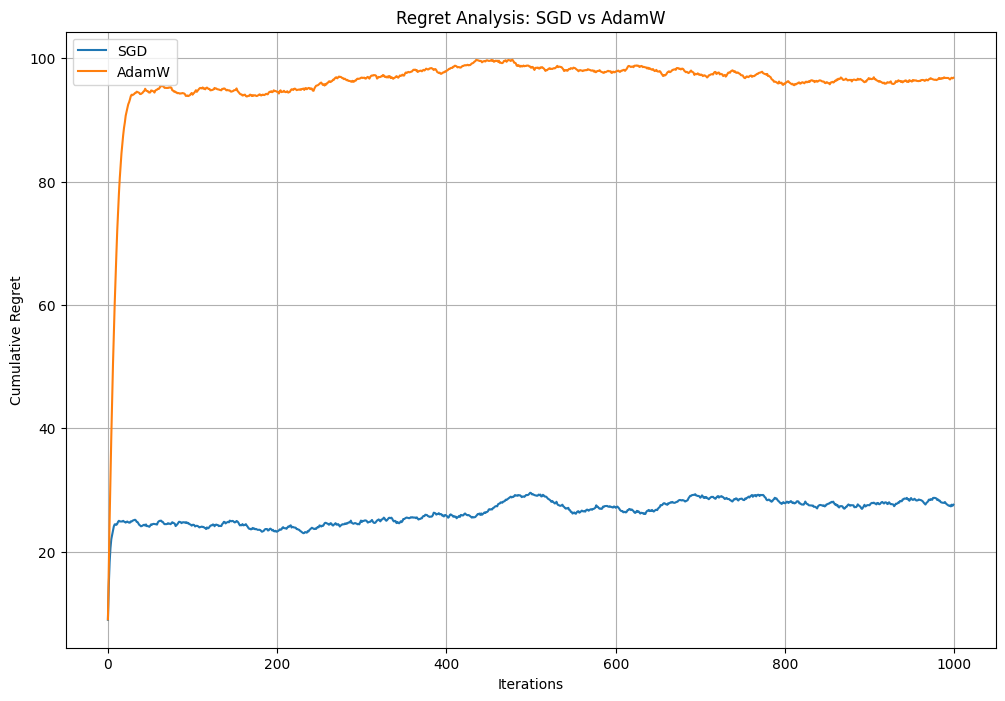

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_function(x, noise_level=0.1):
    return (x - 2)**2 + np.random.normal(0, noise_level)

def sgd_update(x, lr, gradient):
    return x - lr * gradient

def adamw_update(x, lr, m, v, t, gradient, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.01):
    m = beta1 * m + (1 - beta1) * gradient
    v = beta2 * v + (1 - beta2) * gradient**2
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    return x - lr * (m_hat / (np.sqrt(v_hat) + epsilon) + weight_decay * x), m, v

def run_optimizer(update_func, lr, iterations):
    x = 5  # Starting point
    cumulative_regret = 0
    regret_history = []

    if update_func == adamw_update:
        m, v = 0, 0

    for t in range(1, iterations + 1):
        gradient = 2 * (x - 2)  # True gradient of (x-2)^2
        loss = stochastic_function(x)
        optimal_loss = stochastic_function(2)  # The optimal point is x=2
        instantaneous_regret = loss - optimal_loss
        cumulative_regret += instantaneous_regret
        regret_history.append(cumulative_regret)

        if update_func == sgd_update:
            x = update_func(x, lr, gradient)
        else:
            x, m, v = update_func(x, lr, m, v, t, gradient)

    return regret_history

# Run optimizers
iterations = 1000
sgd_regret = run_optimizer(sgd_update, 0.1, iterations)
adamw_regret = run_optimizer(adamw_update, 0.1, iterations)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(sgd_regret, label='SGD')
plt.plot(adamw_regret, label='AdamW')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Regret')
plt.title('Regret Analysis: SGD vs AdamW')
plt.legend()
plt.grid(True)
plt.show()

### Comprehensive Methods for Analyzing Optimization Algorithms

1. **SDE (Stochastic Differential Equations)**
   - Models the continuous-time limit of optimization algorithms
   - Helps analyze long-term behavior and stability
   - Useful for understanding the effect of noise in stochastic optimization

2. **Spectral Analysis**
   - Examines the eigenvalues and eigenvectors of the update matrices
   - Provides insights into convergence speed and stability
   - Particularly useful for understanding behavior near optima

3. **Information Geometry**
   - Views the parameter space as a Riemannian manifold
   - Helps understand how optimizers navigate the geometry of the loss landscape
   - Explains the effectiveness of adaptive methods like AdamW

4. **Convergence Rate Analysis**
   - Studies how quickly the algorithm approaches the optimum
   - Often expressed in terms of big O notation
   - Helps compare the theoretical efficiency of different algorithms

5. **Dynamical Systems Approach**
   - Treats the optimization process as a dynamical system
   - Analyzes fixed points, stability, and basins of attraction
   - Useful for understanding global behavior and the role of hyperparameters

6. **Regret Analysis**
   - Measures the difference between the algorithm's performance and the best possible performance
   - Common in online learning and bandit problems
   - Provides bounds on the worst-case performance of algorithms

### Advanced and Specialized Methods for Analyzing Optimization Algorithms

9. **Algebraic Geometry Approach**
   - Uses techniques from algebraic geometry to study the structure of critical points
   - Helpful in understanding the geometry of non-convex optimization problems
   - Can provide insights into the distribution and nature of local minima

10. **Tensor Methods**
    - Extends spectral analysis to higher-order tensors
    - Useful for analyzing algorithms that use higher-order derivatives
    - Can provide insights into optimization in very high-dimensional spaces

11. **Statistical Mechanics Approach**
    - Borrows concepts from statistical physics to analyze optimizer behavior
    - Useful for understanding the typical behavior of optimizers on certain classes of problems
    - Can provide insights into phase transitions in learning dynamics

12. **Topological Data Analysis**
    - Uses techniques from topology to study the structure of the loss landscape
    - Can reveal persistent features of the loss surface across scales
    - Useful for understanding how optimizers navigate complex, high-dimensional loss landscapes

13. **Symmetry and Group Theory Analysis**
    - Examines how optimizers interact with symmetries in the problem structure
    - Useful for understanding invariance properties of optimizers
    - Can provide insights into generalization capabilities

14. **Fractional Calculus Approach**
    - Uses fractional derivatives to model long-term memory effects in optimization
    - Can provide insights into algorithms with adaptive memory (like Adam variants)
    - Useful for analyzing behavior on problems with long-range dependencies

15. **Optimal Transport Theory**
    - Studies how optimizers transform probability distributions in parameter space
    - Useful for understanding the evolution of parameter distributions during training
    - Can provide insights into generalization and robustness

16. **Tropical Geometry**
    - Applies techniques from tropical algebra to study piecewise linear approximations of the loss landscape
    - Can provide insights into the behavior of ReLU networks and other piecewise linear models
    - Useful for understanding the combinatorial structure of deep learning optimization

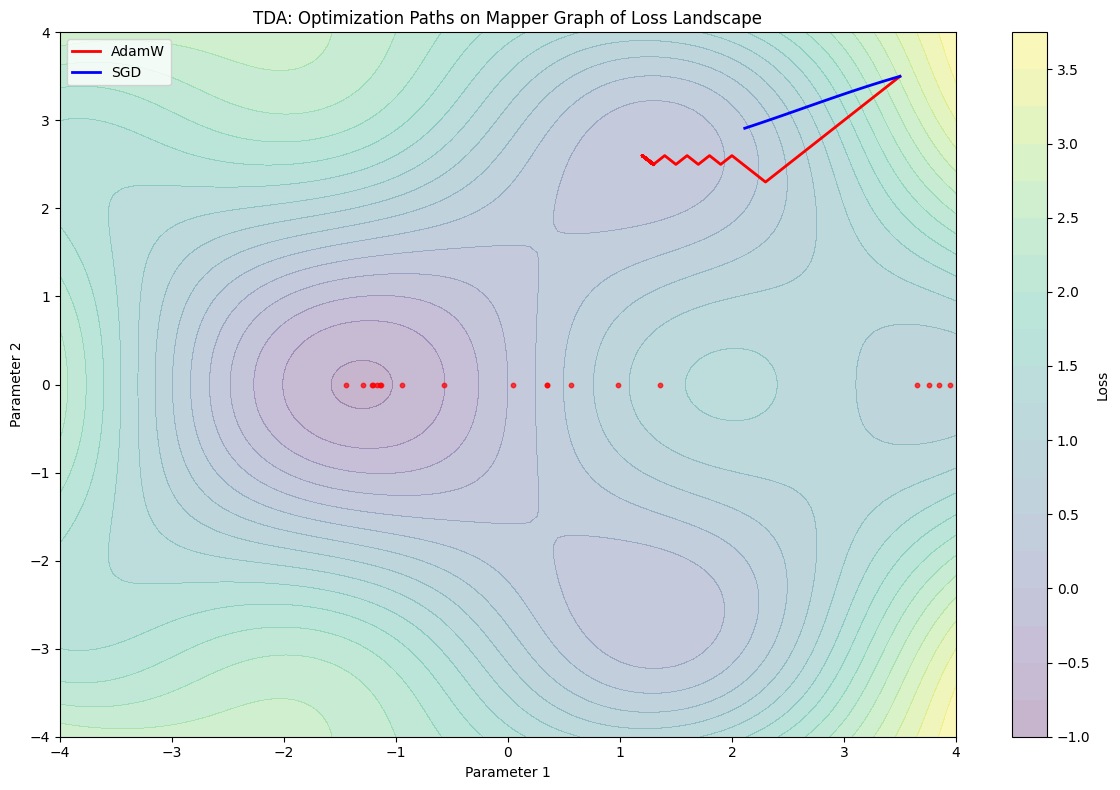

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

def generate_loss_landscape(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * (x**2 + y**2)

def create_mapper_graph(x, y, z, resolution=10):
    tri = Delaunay(np.column_stack([x, y]))
    intervals = np.linspace(z.min(), z.max(), resolution)
    nodes = []
    edges = set()

    for i in range(len(intervals) - 1):
        mask = (z >= intervals[i]) & (z < intervals[i+1])
        if np.any(mask):
            nodes.append(np.mean(np.column_stack([x[mask], y[mask]]), axis=0))

            for simplex in tri.simplices:
                if np.sum(mask[simplex]) >= 2:
                    for j in range(3):
                        for k in range(j+1, 3):
                            edges.add((len(nodes)-1, len(nodes)-1))  # Connect node to itself as placeholder

    return np.array(nodes), np.array(list(edges))

def optimize(optimizer, start, steps=100):
    path = [start]
    current = start
    for _ in range(steps):
        gradient = np.array([np.cos(current[0]) * np.cos(current[1]) + 0.2 * current[0],
                             -np.sin(current[0]) * np.sin(current[1]) + 0.2 * current[1]])
        if optimizer == "AdamW":
            step = 0.1 * gradient / (np.abs(gradient) + 1e-8)  # Simplified AdamW update
        else:  # SGD
            step = 0.01 * gradient
        current = current - step
        path.append(current)
    return np.array(path)

# Generate loss landscape
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = generate_loss_landscape(X, Y)

# Create Mapper graph
nodes, edges = create_mapper_graph(X.ravel(), Y.ravel(), Z.ravel(), resolution=20)

# Generate optimization paths
start_point = np.array([3.5, 3.5])
adamw_path = optimize("AdamW", start_point)
sgd_path = optimize("SGD", start_point)

# Plotting
plt.figure(figsize=(12, 8))
plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.3)
plt.colorbar(label='Loss')

# Plot Mapper graph
for edge in edges:
    plt.plot(nodes[edge, 0], nodes[edge, 1], 'k-', alpha=0.3, linewidth=0.5)
plt.scatter(nodes[:, 0], nodes[:, 1], c='red', s=10, alpha=0.7)

# Plot optimization paths
plt.plot(adamw_path[:, 0], adamw_path[:, 1], 'r-', label='AdamW', linewidth=2)
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'b-', label='SGD', linewidth=2)

plt.title("TDA: Optimization Paths on Mapper Graph of Loss Landscape")
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")
plt.legend()
plt.tight_layout()
plt.show()

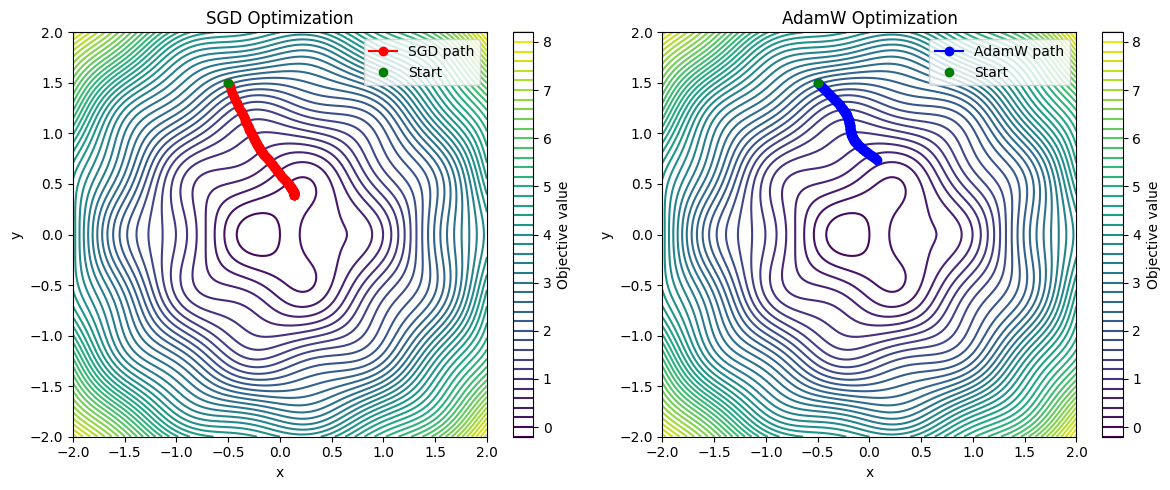

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function (a simple 2D function with multiple local minima)
def objective(x, y):
    return np.sin(5 * x) * np.cos(5 * y) / 5 + x**2 + y**2

# Define the gradient of the objective function
def gradient(x, y):
    dx = np.cos(5 * x) * np.cos(5 * y) + 2 * x
    dy = -np.sin(5 * x) * np.sin(5 * y) + 2 * y
    return np.array([dx, dy])

# Implement SGD optimizer
def sgd(start, lr, num_iterations):
    x, y = start
    path = [start]
    for _ in range(num_iterations):
        grad = gradient(x, y)
        x -= lr * grad[0]
        y -= lr * grad[1]
        path.append((x, y))
    return np.array(path)

# Implement AdamW optimizer
def adamw(start, lr, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8, weight_decay=0.01):
    x, y = start
    path = [start]
    m = np.zeros(2)
    v = np.zeros(2)
    for t in range(1, num_iterations + 1):
        grad = gradient(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        update = lr * m_hat / (np.sqrt(v_hat) + epsilon)
        x -= update[0] + lr * weight_decay * x
        y -= update[1] + lr * weight_decay * y
        path.append((x, y))
    return np.array(path)

# Set up the optimization problem
start_point = (-0.5, 1.5)
lr = 0.01
num_iterations = 100

# Run optimizers
sgd_path = sgd(start_point, lr, num_iterations)
adamw_path = adamw(start_point, lr, num_iterations)

# Create a contour plot of the objective function
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

# Plot the results
plt.figure(figsize=(12, 5))

# SGD plot
plt.subplot(121)
plt.contour(X, Y, Z, levels=50)
plt.colorbar(label='Objective value')
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'ro-', label='SGD path')
plt.plot(start_point[0], start_point[1], 'go', label='Start')
plt.title('SGD Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# AdamW plot
plt.subplot(122)
plt.contour(X, Y, Z, levels=50)
plt.colorbar(label='Objective value')
plt.plot(adamw_path[:, 0], adamw_path[:, 1], 'bo-', label='AdamW path')
plt.plot(start_point[0], start_point[1], 'go', label='Start')
plt.title('AdamW Optimization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## Fractional Calculus Approach to Optimization Algorithms

## Introduction

Fractional calculus provides a powerful framework for modeling long-term memory effects in optimization algorithms. This approach is particularly useful for analyzing algorithms with adaptive memory, such as Adam and its variants, and for understanding behavior on problems with long-range dependencies.

## Fractional Derivatives

The fractional derivative of order $\alpha$ ($0 < \alpha < 1$) of a function $f(t)$ is defined as:

$$
D^\alpha f(t) = \frac{1}{\Gamma(1-\alpha)} \frac{d}{dt} \int_0^t \frac{f(\tau)}{(t-\tau)^\alpha} d\tau
$$

where $\Gamma$ is the gamma function.

## Application to Optimization

Consider the general form of a gradient descent update:

$$
x_{t+1} = x_t - \eta \nabla f(x_t)
$$

We can extend this to a fractional order update:

$$
x_{t+1} = x_t - \eta D^{1-\alpha} \nabla f(x_t)
$$

Here, $D^{1-\alpha}$ represents the fractional derivative of order $1-\alpha$.

## Example: Fractional Adam

Let's consider a fractional version of the Adam optimizer. The standard Adam update rule is:

$$
\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1-\beta_1) \nabla f(x_t) \\
v_t &= \beta_2 v_{t-1} + (1-\beta_2) (\nabla f(x_t))^2 \\
\hat{m}_t &= \frac{m_t}{1-\beta_1^t} \\
\hat{v}_t &= \frac{v_t}{1-\beta_2^t} \\
x_{t+1} &= x_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
\end{aligned}
$$

A fractional Adam could be formulated as:

$$
\begin{aligned}
m_t &= D^{\alpha_1} \nabla f(x_t) \\
v_t &= D^{\alpha_2} (\nabla f(x_t))^2 \\
x_{t+1} &= x_t - \eta \frac{m_t}{\sqrt{v_t} + \epsilon}
\end{aligned}
$$

Here, $D^{\alpha_1}$ and $D^{\alpha_2}$ are fractional derivatives of orders $\alpha_1$ and $\alpha_2$ respectively.

## Analysis

The fractional approach allows us to model a continuous spectrum of memory effects in the optimization process. When $\alpha \to 1$, we recover the standard first-order methods. As $\alpha$ decreases, the algorithm incorporates more long-term history into its updates.

This formulation can provide insights into:

1. The role of memory in optimization algorithms
2. The behavior of adaptive methods on problems with long-range dependencies
3. The trade-off between short-term and long-term information in gradient updates

## Conclusion

The fractional calculus approach offers a unified framework for analyzing and designing optimization algorithms with varying degrees of memory. This can lead to new insights into existing methods and potentially to the development of novel algorithms tailored for specific types of optimization landscapes.

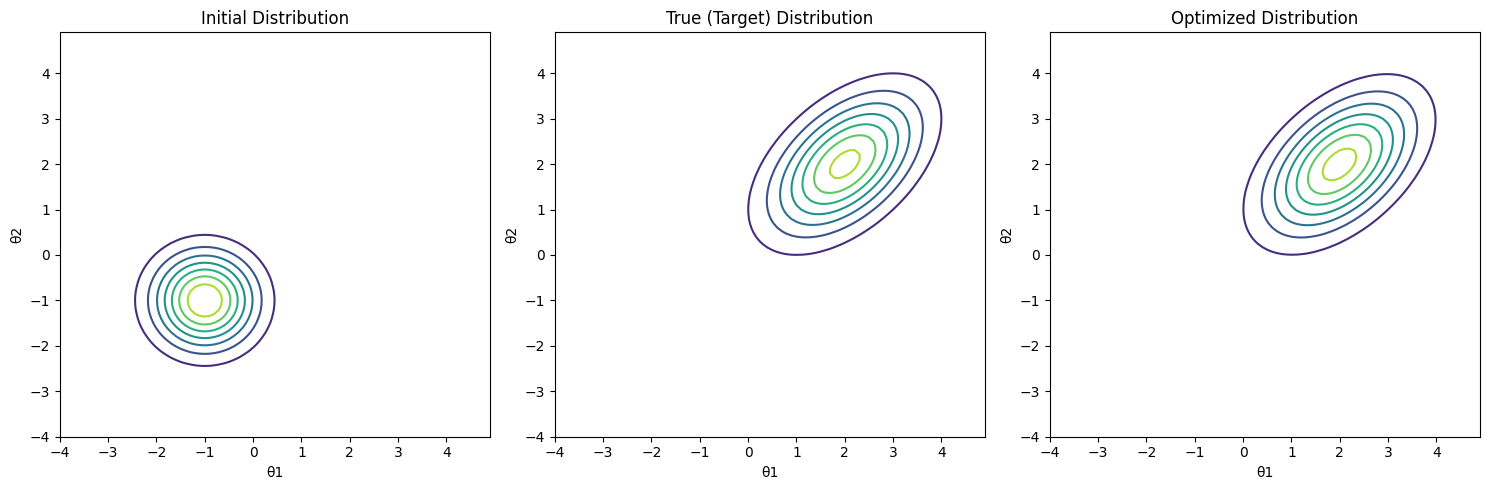

<ipython-input-10-a71661aca2e9>:65: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sum((mean1 - mean2)**2) + np.trace(cov1 + cov2 - 2*np.sqrt(np.sqrt(cov1)@cov2@np.sqrt(cov1))))


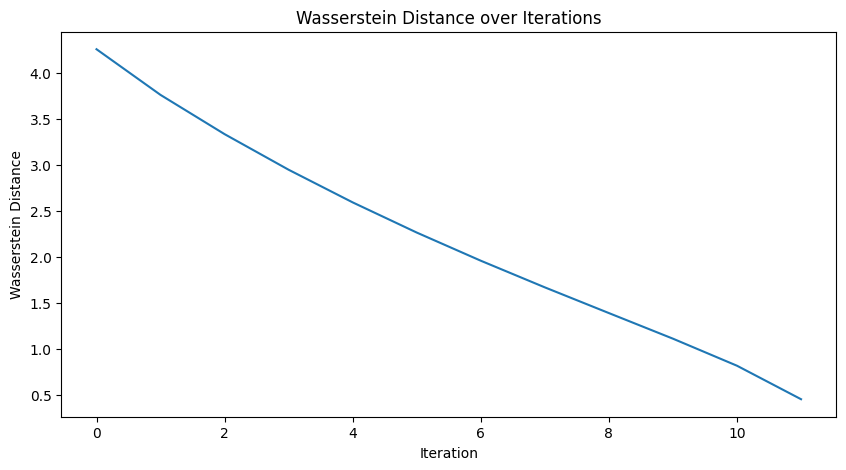

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.optimize import minimize

# Define our "true" distribution (target)
true_mean = np.array([2, 2])
true_cov = np.array([[1, 0.5], [0.5, 1]])

# Define our initial distribution
init_mean = np.array([-1, -1])
init_cov = np.array([[0.5, 0], [0, 0.5]])

# Create a grid of points
x, y = np.mgrid[-4:5:.1, -4:5:.1]
pos = np.dstack((x, y))

# Calculate the densities
true_density = multivariate_normal.pdf(pos, true_mean, true_cov)
init_density = multivariate_normal.pdf(pos, init_mean, init_cov)

# Define a simple loss function (negative log-likelihood)
def loss(params):
    mean = params[:2]
    cov = np.array([[params[2], params[3]], [params[3], params[4]]])
    return -np.sum(multivariate_normal.logpdf(pos, mean, cov) * true_density)

# Optimize
initial_guess = [init_mean[0], init_mean[1], init_cov[0,0], init_cov[0,1], init_cov[1,1]]
result = minimize(loss, initial_guess, method='Nelder-Mead')

# Extract optimized parameters
opt_mean = result.x[:2]
opt_cov = np.array([[result.x[2], result.x[3]], [result.x[3], result.x[4]]])

# Calculate optimized density
opt_density = multivariate_normal.pdf(pos, opt_mean, opt_cov)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.contour(x, y, init_density)
plt.title('Initial Distribution')
plt.xlabel('θ1')
plt.ylabel('θ2')

plt.subplot(132)
plt.contour(x, y, true_density)
plt.title('True (Target) Distribution')
plt.xlabel('θ1')
plt.ylabel('θ2')

plt.subplot(133)
plt.contour(x, y, opt_density)
plt.title('Optimized Distribution')
plt.xlabel('θ1')
plt.ylabel('θ2')

plt.tight_layout()
plt.show()

# Calculate and plot Wasserstein distance over iterations
def wasserstein_2d(mean1, cov1, mean2, cov2):
    return np.sqrt(np.sum((mean1 - mean2)**2) + np.trace(cov1 + cov2 - 2*np.sqrt(np.sqrt(cov1)@cov2@np.sqrt(cov1))))

iterations = 50
w_distances = []

current_mean = init_mean
current_cov = init_cov

for _ in range(iterations):
    w_distances.append(wasserstein_2d(current_mean, current_cov, true_mean, true_cov))
    current_mean = current_mean + 0.1 * (true_mean - current_mean)
    current_cov = current_cov + 0.1 * (true_cov - current_cov)

plt.figure(figsize=(10, 5))
plt.plot(range(iterations), w_distances)
plt.title('Wasserstein Distance over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Wasserstein Distance')
plt.show()

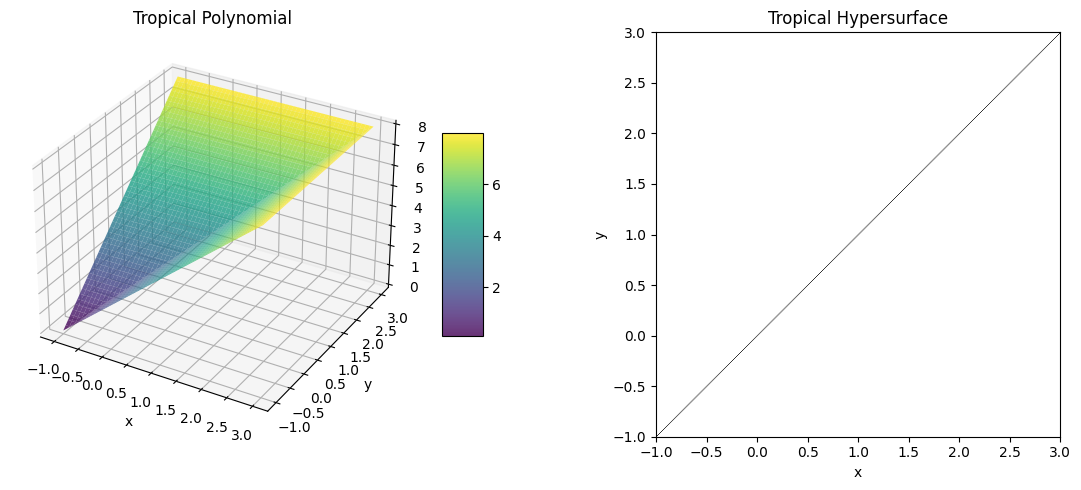

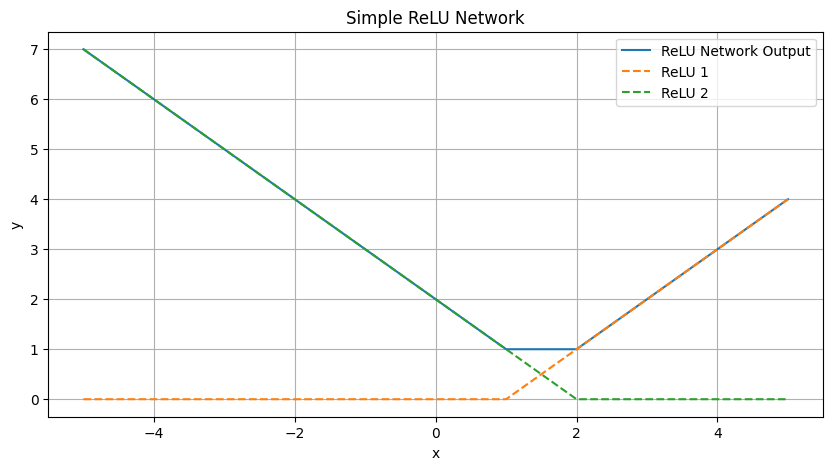

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def tropical_polynomial(x, y, coeffs):
    """Compute the tropical polynomial."""
    return np.max([c + i*x + j*y for (i, j, c) in coeffs], axis=0)

def tropical_hypersurface(x, y, coeffs):
    """Compute the tropical hypersurface."""
    values = np.array([c + i*x + j*y for (i, j, c) in coeffs])
    max_value = np.max(values, axis=0)
    return np.sum(np.abs(values - max_value) < 1e-10, axis=0) > 1

# Define the tropical polynomial coefficients
coeffs = [
    (0, 0, 0),   # x^0 * y^0
    (1, 0, 0),   # x^1 * y^0
    (0, 1, 0),   # x^0 * y^1
    (1, 1, 1),   # x^1 * y^1
    (2, 0, 2),   # x^2 * y^0
    (0, 2, 2),   # x^0 * y^2
]

# Create a grid of points
x = np.linspace(-1, 3, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Compute the tropical polynomial and hypersurface
Z = tropical_polynomial(X, Y, coeffs)
H = tropical_hypersurface(X, Y, coeffs)

# Plot the tropical polynomial
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Tropical Polynomial')
fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot the tropical hypersurface
ax2 = fig.add_subplot(122)
ax2.imshow(H, extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='binary', alpha=0.8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Tropical Hypersurface')

plt.tight_layout()
plt.show()

# Visualize a simple ReLU network
def relu(x):
    return np.maximum(0, x)

def simple_relu_network(x, w1, b1, w2, b2):
    return relu(w1 * x + b1) + relu(w2 * x + b2)

# Create a grid of points for the ReLU network
x = np.linspace(-5, 5, 1000)
w1, b1, w2, b2 = 1, -1, -1, 2

# Compute the output of the ReLU network
y = simple_relu_network(x, w1, b1, w2, b2)

# Plot the ReLU network output
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='ReLU Network Output')
plt.plot(x, relu(w1 * x + b1), '--', label='ReLU 1')
plt.plot(x, relu(w2 * x + b2), '--', label='ReLU 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple ReLU Network')
plt.legend()
plt.grid(True)
plt.show()

# Theory - Newton Raphson

**Understanding the Taylor Series Expansion in Multiple Dimensions and Its Role in the Newton-Raphson Method**

---

**Introduction**

I understand that the notation and concepts involved in multivariable calculus and optimization can be quite challenging. Let's break down the Taylor series expansion in multiple dimensions step by step, explain the notation, and see how it fits into the Newton-Raphson method. We'll use concrete examples to make each concept clear.

---

### **1. Background: Functions in Multiple Dimensions**

Before diving into the Taylor series, let's clarify what we're dealing with:

- **Function \( f: \mathbb{R}^n \rightarrow \mathbb{R} \):**

  - **Definition:** A function that takes a vector \( x \) in \( n \)-dimensional space and outputs a real number.
  - **Example:** Consider \( f(x, y) = x^2 + y^2 \). It maps a point \( (x, y) \) in 2D space to a real number.

- **Variables and Vectors:**

  - **\( x \):** An \( n \)-dimensional vector \( x = [x_1, x_2, \dots, x_n]^T \).
  - **\( x_k \):** The current approximation or point in \( \mathbb{R}^n \) at iteration \( k \).
  - **\( x - x_k \):** The displacement vector from \( x_k \) to \( x \).

---

### **2. The Taylor Series Expansion in Multiple Dimensions**

The Taylor series expansion approximates a function near a point using derivatives at that point.

#### **2.1. Single Variable Case**

In one dimension, the Taylor series of \( f(x) \) around \( x_k \) is:

\[
f(x) \approx f(x_k) + f'(x_k)(x - x_k) + \frac{1}{2} f''(x_k)(x - x_k)^2 + \dots
\]

This expansion uses derivatives of increasing order to approximate \( f(x) \) near \( x_k \).

#### **2.2. Multivariable Case**

In multiple dimensions, the Taylor series up to the second order is:

\[
f(x) \approx f(x_k) + \nabla f(x_k)^T (x - x_k) + \frac{1}{2} (x - x_k)^T \nabla^2 f(x_k) (x - x_k)
\]

- **\( \nabla f(x_k) \):** Gradient vector (first derivatives).
- **\( \nabla^2 f(x_k) \):** Hessian matrix (second derivatives).

**Let's explain each term and the notation.**

---

### **3. Understanding the Notation and Terms**

#### **3.1. Gradient Vector \( \nabla f(x_k) \)**

- **Definition:** A vector of first partial derivatives of \( f \) at \( x_k \).

\[
\nabla f(x_k) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} (x_k) \\
\frac{\partial f}{\partial x_2} (x_k) \\
\vdots \\
\frac{\partial f}{\partial x_n} (x_k)
\end{bmatrix}
\]

- **Represents:** The direction of the steepest increase of \( f \) at \( x_k \).

#### **3.2. Hessian Matrix \( \nabla^2 f(x_k) \)**

- **Definition:** A square \( n \times n \) matrix of second partial derivatives.

\[
\nabla^2 f(x_k) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \dots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
\]

- **Represents:** The curvature of \( f \) at \( x_k \).

#### **3.3. Transpose Operator \( ^T \)**

- **Definition:** Transposes a vector or matrix, switching rows and columns.

- **Why is it used here?**

  - **\( \nabla f(x_k)^T (x - x_k) \):**

    - \( \nabla f(x_k) \) is a column vector.
    - \( (x - x_k) \) is a column vector.
    - To compute the dot product (scalar), we transpose the gradient to a row vector and multiply:

      \[
      \text{Scalar} = \text{Row Vector} \times \text{Column Vector}
      \]

  - **\( (x - x_k)^T \nabla^2 f(x_k) (x - x_k) \):**

    - \( \nabla^2 f(x_k) \) is a matrix.
    - \( (x - x_k) \) is a column vector.
    - \( (x - x_k)^T \) is a row vector.
    - The expression computes a scalar: row vector times matrix times column vector.

---

### **4. Breaking Down the Taylor Series Expansion**

Let's write down the expansion again:

\[
f(x) \approx f(x_k) + \nabla f(x_k)^T (x - x_k) + \frac{1}{2} (x - x_k)^T \nabla^2 f(x_k) (x - x_k)
\]

**Term by Term Explanation:**

1. **\( f(x_k) \):**

   - The value of \( f \) at the point \( x_k \).

2. **\( \nabla f(x_k)^T (x - x_k) \):**

   - **Interpretation:** Linear approximation of how \( f \) changes near \( x_k \).
   - **Computation:** It's the dot product of the gradient and the displacement vector.

3. **\( \frac{1}{2} (x - x_k)^T \nabla^2 f(x_k) (x - x_k) \):**

   - **Interpretation:** Accounts for the curvature of \( f \) near \( x_k \).
   - **Computation:** Results in a scalar, representing the second-order change.

---

### **5. Concrete Example**

Let's work through a simple example in two dimensions to illustrate these concepts.

#### **5.1. Define a Function**

Let \( f(x, y) = x^2 + xy + y^2 \).

#### **5.2. Choose a Point \( x_k \)**

Let \( x_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \).

#### **5.3. Compute \( f(x_k) \)**

\[
f(x_k) = (1)^2 + (1)(2) + (2)^2 = 1 + 2 + 4 = 7
\]

#### **5.4. Compute the Gradient \( \nabla f(x_k) \)**

First, compute the partial derivatives:

- \( \frac{\partial f}{\partial x} = 2x + y \)
- \( \frac{\partial f}{\partial y} = x + 2y \)

At \( x_k = (1, 2) \):

- \( \frac{\partial f}{\partial x}(x_k) = 2(1) + 2 = 4 \)
- \( \frac{\partial f}{\partial y}(x_k) = 1 + 2(2) = 5 \)

So, the gradient vector is:

\[
\nabla f(x_k) = \begin{bmatrix} 4 \\ 5 \end{bmatrix}
\]

#### **5.5. Compute the Hessian \( \nabla^2 f(x_k) \)**

Compute the second partial derivatives:

- \( \frac{\partial^2 f}{\partial x^2} = 2 \)
- \( \frac{\partial^2 f}{\partial x \partial y} = 1 \)
- \( \frac{\partial^2 f}{\partial y \partial x} = 1 \) (Mixed partial derivatives are equal if the function is smooth.)
- \( \frac{\partial^2 f}{\partial y^2} = 2 \)

So, the Hessian matrix is:

\[
\nabla^2 f(x_k) = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
\]

#### **5.6. Compute the Displacement Vector \( x - x_k \)**

Let’s suppose we want to approximate \( f \) near \( x_k \), say at \( x = \begin{bmatrix} 1.1 \\ 1.9 \end{bmatrix} \).

Then:

\[
x - x_k = \begin{bmatrix} 1.1 \\ 1.9 \end{bmatrix} - \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 0.1 \\ -0.1 \end{bmatrix}
\]

#### **5.7. Compute Each Term**

**First-order term:**

\[
\nabla f(x_k)^T (x - x_k) = \begin{bmatrix} 4 \\ 5 \end{bmatrix}^T \begin{bmatrix} 0.1 \\ -0.1 \end{bmatrix} = (4)(0.1) + (5)(-0.1) = 0.4 - 0.5 = -0.1
\]

**Second-order term:**

\[
(x - x_k)^T \nabla^2 f(x_k) (x - x_k) = \begin{bmatrix} 0.1 & -0.1 \end{bmatrix} \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} 0.1 \\ -0.1 \end{bmatrix}
\]

First, compute \( \nabla^2 f(x_k) (x - x_k) \):

\[
\nabla^2 f(x_k) (x - x_k) = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} 0.1 \\ -0.1 \end{bmatrix} = \begin{bmatrix} (2)(0.1) + (1)(-0.1) \\ (1)(0.1) + (2)(-0.1) \end{bmatrix} = \begin{bmatrix} 0.2 - 0.1 \\ 0.1 - 0.2 \end{bmatrix} = \begin{bmatrix} 0.1 \\ -0.1 \end{bmatrix}
\]

Then, compute \( (x - x_k)^T \times \) the above result:

\[
(x - x_k)^T (\text{Result}) = \begin{bmatrix} 0.1 & -0.1 \end{bmatrix} \begin{bmatrix} 0.1 \\ -0.1 \end{bmatrix} = (0.1)(0.1) + (-0.1)(-0.1) = 0.01 + 0.01 = 0.02
\]

**Second-order term with \( \frac{1}{2} \):**

\[
\frac{1}{2} \times 0.02 = 0.01
\]

#### **5.8. Approximate \( f(x) \) Using the Expansion**

Now, we can approximate \( f(x) \):

\[
f(x) \approx f(x_k) + \nabla f(x_k)^T (x - x_k) + \frac{1}{2} (x - x_k)^T \nabla^2 f(x_k) (x - x_k)
\]

Substitute the values:

\[
f(x) \approx 7 + (-0.1) + 0.01 = 6.91
\]

#### **5.9. Compute the Actual Value of \( f(x) \)**

Let's compute \( f(x) \) directly at \( x = (1.1, 1.9) \):

\[
f(1.1, 1.9) = (1.1)^2 + (1.1)(1.9) + (1.9)^2 = 1.21 + 2.09 + 3.61 = 6.91
\]

**Result:** Our approximation matches the actual value, indicating the Taylor expansion works well for small displacements.

---

### **6. Connecting to the Newton-Raphson Method**

The Newton-Raphson method uses this Taylor expansion to find the next approximation \( x_{k+1} \).

#### **6.1. Goal**

- Find \( x \) such that \( \nabla f(x) = 0 \).

#### **6.2. Using the Taylor Expansion of the Gradient**

Expand \( \nabla f(x) \) around \( x_k \):

\[
\nabla f(x) \approx \nabla f(x_k) + \nabla^2 f(x_k)(x - x_k)
\]

We set \( \nabla f(x) = 0 \) (since we're looking for stationary points):

\[
0 = \nabla f(x_k) + \nabla^2 f(x_k)(x_{k+1} - x_k)
\]

#### **6.3. Solving for \( x_{k+1} \)**

Rearrange the equation:

\[
\nabla^2 f(x_k)(x_{k+1} - x_k) = -\nabla f(x_k)
\]

Multiply both sides by the inverse of \( \nabla^2 f(x_k) \):

\[
x_{k+1} - x_k = -[\nabla^2 f(x_k)]^{-1} \nabla f(x_k)
\]

Therefore:

\[
x_{k+1} = x_k - [\nabla^2 f(x_k)]^{-1} \nabla f(x_k)
\]

This is the Newton-Raphson update formula in multiple dimensions.

---

### **7. Addressing Your Specific Questions**

#### **7.1. Why Does the Gradient Need to be Transposed?**

- **Dot Product in Multiple Dimensions:**

  - To compute \( \nabla f(x_k)^T (x - x_k) \), we need the inner product (dot product) between two vectors.
  - \( \nabla f(x_k) \) is a column vector.
  - \( (x - x_k) \) is also a column vector.
  - The dot product is only defined between a row vector and a column vector.
  - Transposing \( \nabla f(x_k) \) to a row vector allows us to compute the dot product.

- **Second-Order Term:**

  - \( (x - x_k)^T \nabla^2 f(x_k) (x - x_k) \):

    - \( (x - x_k)^T \): Row vector.
    - \( \nabla^2 f(x_k) \): Matrix.
    - \( (x - x_k) \): Column vector.
    - Multiplication order matters to ensure the dimensions align correctly for matrix multiplication.

#### **7.2. How Does the Derivative Lead to the Gradient Term?**

- In multiple dimensions, the derivative of \( f(x) \) with respect to \( x \) is the gradient \( \nabla f(x) \).
- When we expand \( f(x) \) using the Taylor series, the first-order term involves the gradient.

#### **7.3. Differentiability and Continuity**

- **Taylor Series Requires Differentiability:**

  - The Taylor series expansion relies on the existence of derivatives up to the required order.
  - If \( f(x) \) is not differentiable at \( x_k \), we cannot use the Taylor expansion there.

- **Handling Non-Differentiable Points:**

  - If the function is non-differentiable at certain points, the Newton-Raphson method may not work there.
  - However, if the function is differentiable in the region of interest (where we're approximating), we can still apply the method.

---

### **8. Summary**

- **Multivariable Taylor Series Expansion:**

  - Approximates \( f(x) \) near \( x_k \) using the function value, gradient, and Hessian at \( x_k \).

- **Notation and Transposes:**

  - Transposes are used to align vectors and matrices correctly for multiplication.
  - The gradient is transposed to compute the dot product with the displacement vector.

- **Newton-Raphson Method:**

  - Uses the Taylor expansion of the gradient to find the next approximation.
  - Requires computing the gradient and Hessian.

- **Differentiability:**

  - The method requires the function to be differentiable at the points of interest.
  - Non-differentiable points pose challenges for the method.

---

### **9. Final Thoughts**

I hope this step-by-step explanation clarifies how the Taylor series expansion works in multiple dimensions and how it connects to the Newton-Raphson method. By working through the concrete example, we've seen how each term is computed and why the notation (including transposes) is necessary.

If you have further questions or need clarification on any specific part, please let me know, and I'll be happy to help!

# Plots for IA writeup

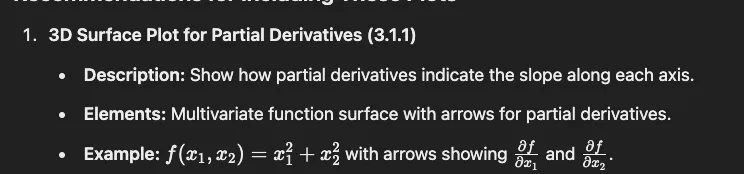

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_surface_plot():
    # Create figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Generate data for surface
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = X**2 + Y**2

    # Create surface plot
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8,
                          linewidth=0, antialiased=True)

    # Add partial derivative arrows at point (1, 1)
    point = np.array([-1.5, 1.5])
    z_point = point[0]**2 + point[1]**2  # Height at the point

    # Partial derivative with respect to x1 (red arrow)
    dx1 = 0.5  # Length of the arrow
    dz1 = 2 * point[0] * dx1  # Change in z for partial wrt x1
    ax.quiver(point[0], point[1], z_point,
             dx1, 0, dz1,  # Direction vector
             color='red', linewidth=2, label='∂f/∂x₁', zorder=10)

    # Partial derivative with respect to x2 (blue arrow)
    dx2 = 0.5  # Length of the arrow
    dz2 = 2 * point[1] * dx2  # Change in z for partial wrt x2
    ax.quiver(point[0], point[1], z_point,
             0, dx2, dz2,  # Direction vector
             color='blue', linewidth=2, label='∂f/∂x₂', zorder=10)

    # Customize the plot
    ax.set_xlabel('x₁', fontsize=12, labelpad=10)
    ax.set_ylabel('x₂', fontsize=12, labelpad=10)
    ax.set_zlabel('f(x₁, x₂)', fontsize=12, labelpad=10)
    ax.set_title('3D Surface Plot: f(x₁, x₂) = x₁² + x₂²\nwith Partial Derivatives',
                 pad=20, fontsize=14)

    # Add colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Function Value')

    # Add legend
    ax.legend()

    # Adjust the view angle for better visualization
    ax.view_init(elev=30, azim=45)

    # Save the plot
    plt.savefig('surface_plot_derivatives.png', dpi=300, bbox_inches='tight')
    plt.close()

# Create the plot
create_surface_plot()
print("Surface plot has been saved as 'surface_plot_derivatives.png'")

Surface plot has been saved as 'surface_plot_derivatives.png'


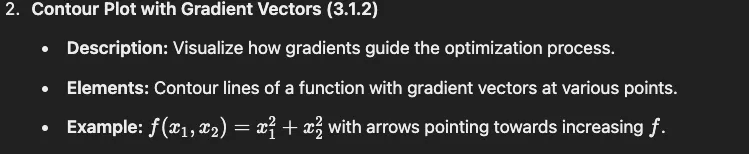

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def create_contour_gradient_plot():
    # Create figure
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # Generate data for contour plot
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = X**2 + Y**2

    # Create contour plot
    levels = np.linspace(0, 4, 15)
    contours = plt.contour(X, Y, Z, levels=levels, cmap='viridis')
    plt.colorbar(contours, label='f(x₁, x₂)')

    # Generate grid of points for gradient vectors
    x_points = np.linspace(-2, 2, 15)
    y_points = np.linspace(-2, 2, 15)
    X_grad, Y_grad = np.meshgrid(x_points, y_points)

    # Calculate gradients at each point
    U = 2 * X_grad  # ∂f/∂x₁ = 2x₁
    V = 2 * Y_grad  # ∂f/∂x₂ = 2x₂

    # Normalize gradient vectors for better visualization
    # Add small constant to prevent division by zero
    norms = np.sqrt(U**2 + V**2)
    # Set a minimum threshold for the norm
    mask = norms > 1e-10
    U_norm = np.zeros_like(U)
    V_norm = np.zeros_like(V)
    U_norm[mask] = U[mask] / norms[mask]
    V_norm[mask] = V[mask] / norms[mask]

    # Plot gradient vectors
    plt.quiver(X_grad, Y_grad, U_norm, V_norm, color='red', alpha=0.7,
              scale=30, width=0.003, label='Gradient Direction')

    # Customize the plot
    plt.xlabel('x₁', fontsize=12)
    plt.ylabel('x₂', fontsize=12)
    plt.title('Contour Plot of f(x₁, x₂) = x₁² + x₂²\nwith Gradient Vectors',
             pad=20, fontsize=14)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.3)

    # Add legend
    plt.legend()

    # Make plot square aspect ratio
    ax.set_aspect('equal')

    # Save the plot
    plt.savefig('contour_gradient_plot.png', dpi=300, bbox_inches='tight')
    plt.close()

# Create the plot
create_contour_gradient_plot()
print("Contour plot with gradient vectors has been saved as 'contour_gradient_plot.png'")

Contour plot with gradient vectors has been saved as 'contour_gradient_plot.png'


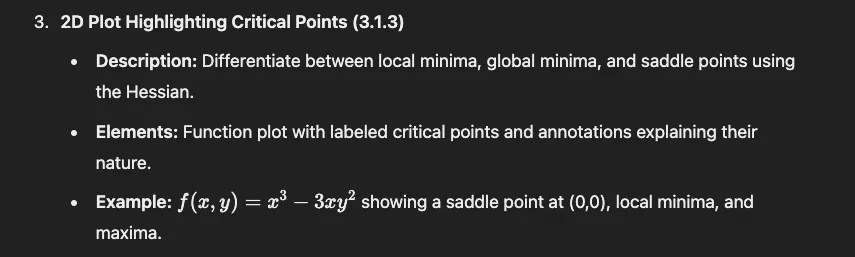

Critical Points and Classification:
Point: {x: -1.74755234583029, y: 0.873776172915144}, Type: Local Minimum
Point: {x: -1.07054229182366, y: 0.535271145911830}, Type: Saddle Point
Point: {x: 0.0, y: 0.0}, Type: Local Minimum
Point: {x: 1.07054229182366, y: -0.535271145911830}, Type: Saddle Point
Point: {x: 1.74755234583029, y: -0.873776172915144}, Type: Local Minimum

Numerical Global Minimum Verification:
Coordinates: [0. 0.], Function Value: 0.0


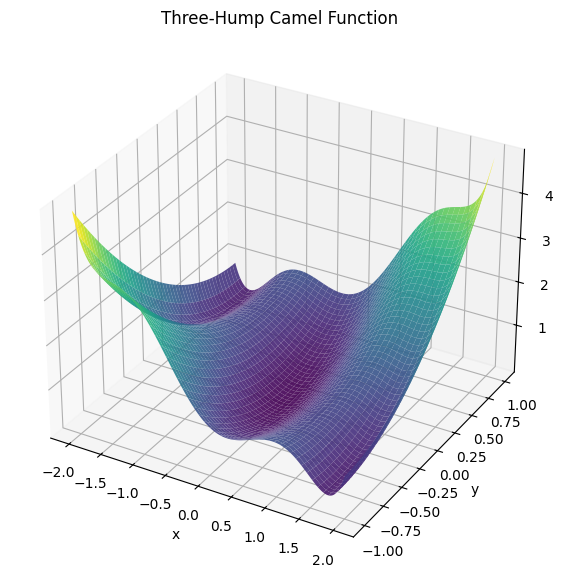

In [26]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the Three-Hump Camel function symbolically
x, y = sp.symbols('x y')
f = 2*x**2 - 1.05*x**4 + (x**6)/6 + x*y + y**2

# Calculate the gradient and Hessian
grad = [sp.diff(f, var) for var in (x, y)]   # Gradient vector
hessian = sp.hessian(f, (x, y))              # Hessian matrix

# Solve for critical points by setting gradient to 0
critical_points = sp.solve(grad, (x, y), dict=True)

# Evaluate the Hessian at each critical point to classify
def classify_critical_point(hessian, point):
    hessian_at_point = np.array(hessian.subs(point)).astype(np.float64)
    eigenvalues = np.linalg.eigvals(hessian_at_point)
    if all(eigenvalues > 0):
        return "Local Minimum"
    elif all(eigenvalues < 0):
        return "Local Maximum"
    elif any(eigenvalues > 0) and any(eigenvalues < 0):
        return "Saddle Point"
    else:
        return "Flat Region"

# Analyze all critical points
print("Critical Points and Classification:")
for point in critical_points:
    classification = classify_critical_point(hessian, point)
    print(f"Point: {point}, Type: {classification}")

# Optional: Numerical Verification of Global Minimum
def three_hump_camel(x):
    return 2*x[0]**2 - 1.05*x[0]**4 + (x[0]**6)/6 + x[0]*x[1] + x[1]**2

# Use Scipy to find the global minimum numerically
result = minimize(three_hump_camel, x0=[0, 0], method='BFGS')
print("\nNumerical Global Minimum Verification:")
print(f"Coordinates: {result.x}, Function Value: {result.fun}")

# Visualization of the function
X = np.linspace(-2, 2, 500)
Y = np.linspace(-1, 1, 500)
X, Y = np.meshgrid(X, Y)
Z = 2*X**2 - 1.05*X**4 + (X**6)/6 + X*Y + Y**2

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax.set_title("Three-Hump Camel Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.show()


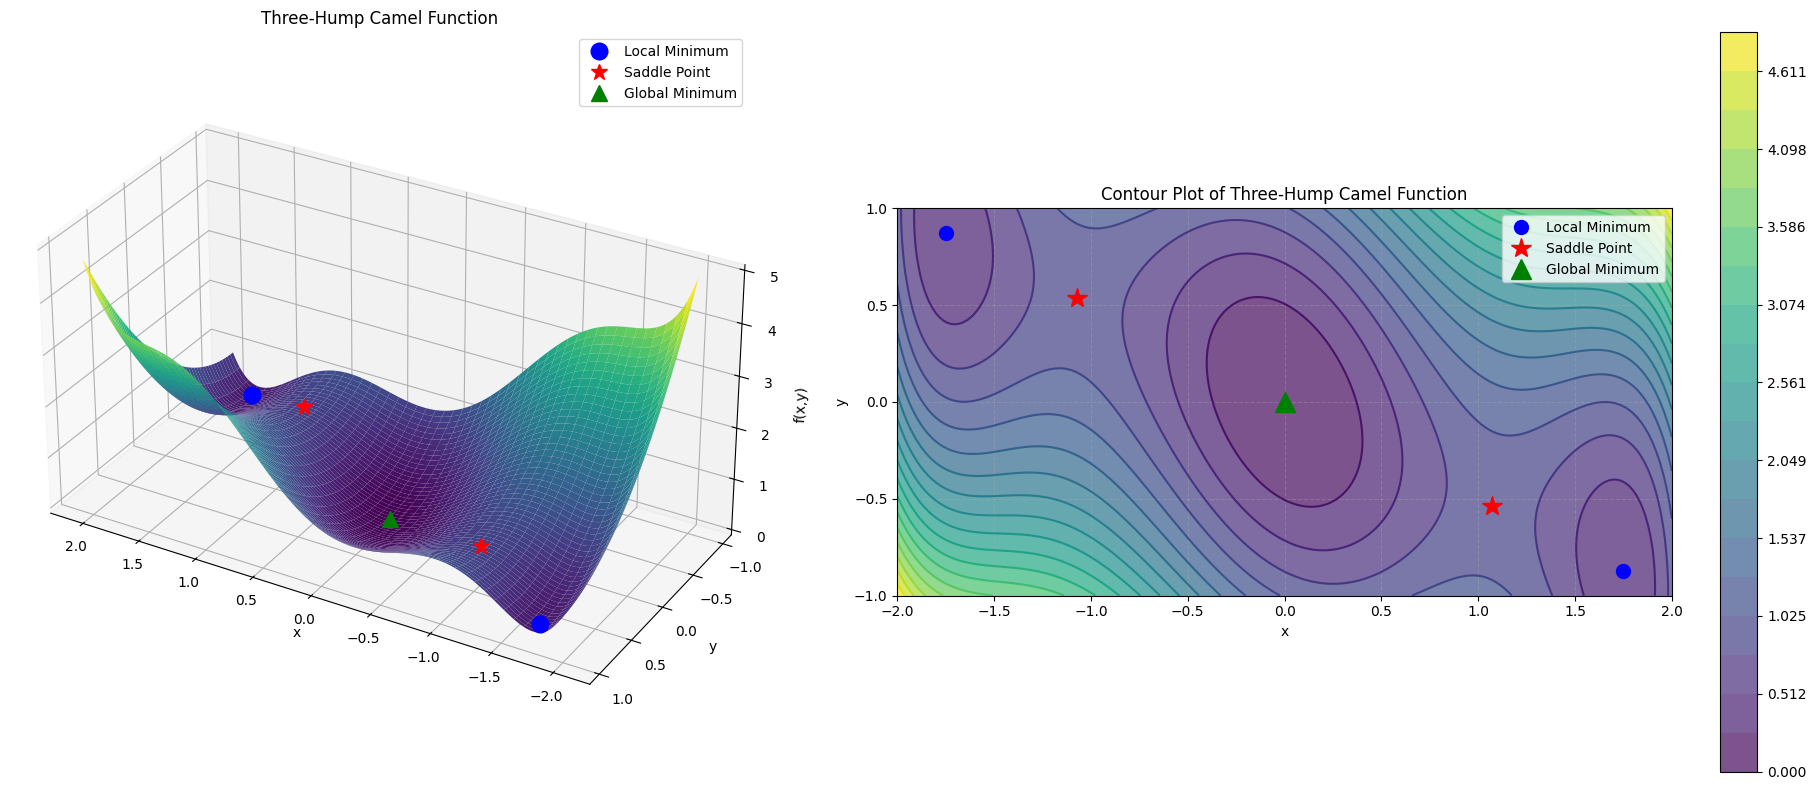

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def three_hump_camel(x, y):
    """Three-hump camel function"""
    return 2*x**2 - 1.05*x**4 + (x**6)/6 + x*y + y**2

# Create data points
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)
Z = three_hump_camel(X, Y)

# Correct critical points from scipy
critical_points = {
    'Local Minimum 1': (-1.74755234583029, 0.873776172915144),
    'Saddle Point 1': (-1.07054229182366, 0.535271145911830),
    'Global Minimum': (0.0, 0.0),
    'Saddle Point 2': (1.07054229182366, -0.535271145911830),
    'Local Minimum 2': (1.74755234583029, -0.873776172915144)
}

# Create figure with two subplots
fig = plt.figure(figsize=(20, 8))

# 3D Surface Plot
ax1 = fig.add_subplot(121, projection='3d')

# Plot surface with lower zorder
surf = ax1.plot_surface(X, Y, Z, cmap='viridis',
                       linewidth=0.5,
                       antialiased=True,
                       alpha=1.0,
                       zorder=1)  # Lower zorder for surface

# Plot critical points in 3D with higher zorder
for label, (x_cp, y_cp) in critical_points.items():
    z_cp = three_hump_camel(x_cp, y_cp)
    if 'Saddle' in label:
        ax1.plot(x_cp, y_cp, z_cp, color='red', marker='*', markersize=12,
                linestyle='None', label='Saddle Point', zorder=10)  # Higher zorder for points
    elif 'Global' in label:
        ax1.plot(x_cp, y_cp, z_cp, color='green', marker='^', markersize=12,
                linestyle='None', label='Global Minimum', zorder=10)
    else:
        ax1.plot(x_cp, y_cp, z_cp, color='blue', marker='o', markersize=12,
                linestyle='None', label='Local Minimum', zorder=10)


ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Three-Hump Camel Function')

# Set custom ticks every 0.5
ax1.set_xticks(np.arange(-2, 2.5, 0.5))
ax1.set_yticks(np.arange(-1, 1.5, 0.5))
ax1.set_zticks(np.arange(0, 6, 1))

# Fix duplicate labels
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc='upper right')

# Set the correct view angle
ax1.view_init(elev=30, azim=120)

# Adjust the plot box aspect ratio
ax1.set_box_aspect([2, 1, 1])

# 2D Contour Plot
ax2 = fig.add_subplot(122)
levels = np.linspace(np.min(Z), np.max(Z), 20)
contours = ax2.contour(X, Y, Z, levels=levels, cmap='viridis')
contourf = ax2.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.7)
fig.colorbar(contourf, ax=ax2)

# Plot critical points in 2D with high zorder
for label, (x_cp, y_cp) in critical_points.items():
    if 'Saddle' in label:
        ax2.plot(x_cp, y_cp, 'r*', markersize=15, label='Saddle Point', zorder=10)
    elif 'Global' in label:
        ax2.plot(x_cp, y_cp, 'g^', markersize=15, label='Global Minimum', zorder=10)
    else:
        ax2.plot(x_cp, y_cp, 'bo', markersize=10, label='Local Minimum', zorder=10)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot of Three-Hump Camel Function')
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.set_aspect('equal')

# Set custom ticks every 0.5
ax2.set_xticks(np.arange(-2, 2.5, 0.5))
ax2.set_yticks(np.arange(-1, 1.5, 0.5))

# Fix duplicate labels
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()

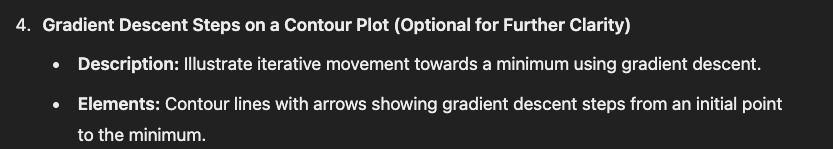

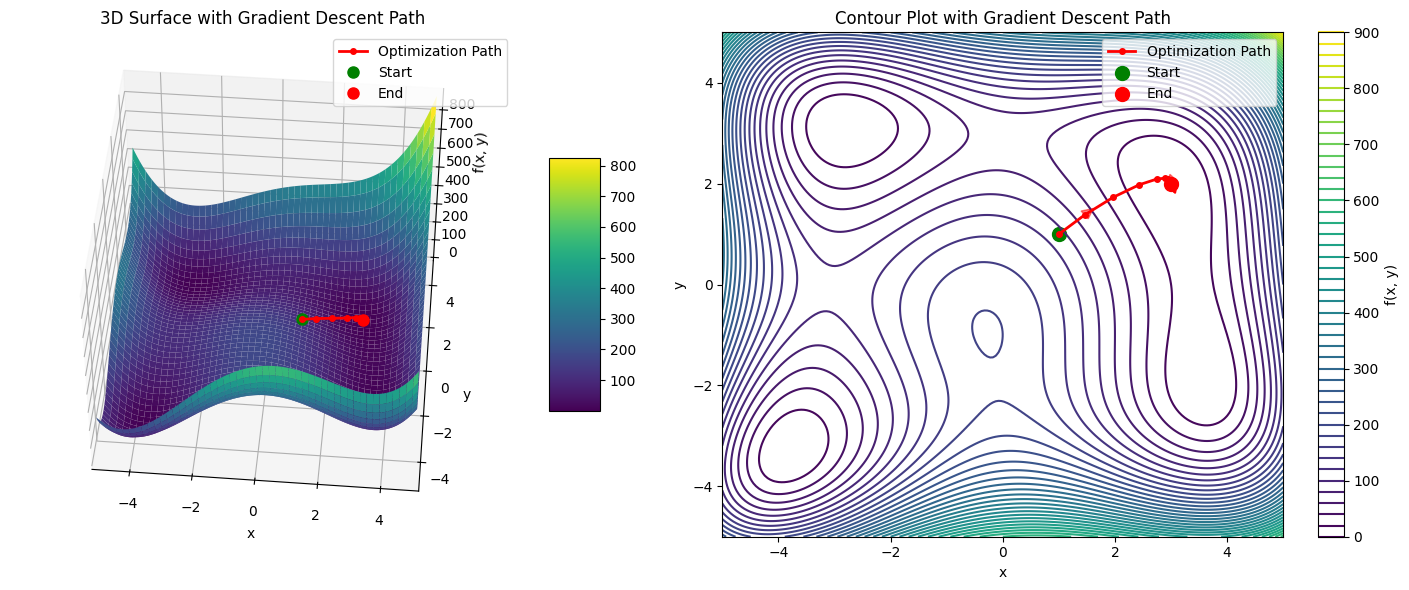

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def himmelblau_gradient(x, y):
    dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([dx, dy])

def plot_himmelblau_optimization(starting_point, learning_rate=0.01, num_steps=20):
    fig = plt.figure(figsize=(15, 6))

    # Generate surface data
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    Z = himmelblau(X, Y)

    # Initialize optimization path
    path = [starting_point]
    current_point = starting_point

    # Perform gradient descent
    for _ in range(num_steps):
        grad = himmelblau_gradient(current_point[0], current_point[1])
        current_point = current_point - learning_rate * grad
        path.append(current_point)

    path = np.array(path)
    path_z = [himmelblau(x, y) for x, y in path]

    # 3D Surface plot (left)
    ax1 = fig.add_subplot(121, projection='3d')

    # Plot surface with alpha=1.0
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=1.0, zorder=1)
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

    # Plot path with zorder=2
    ax1.plot(path[:, 0], path[:, 1], path_z, 'r.-', linewidth=2, markersize=8,
             label='Optimization Path', zorder=10)

    # Plot start and end markers with smaller size and zorder=3
    ax1.plot([path[0, 0]], [path[0, 1]], [path_z[0]], 'go', markersize=8,
             label='Start', zorder=3)
    ax1.plot([path[-1, 0]], [path[-1, 1]], [path_z[-1]], 'ro', markersize=8,
             label='End', zorder=3)

    ax1.view_init(elev=45, azim=275)
    ax1.set_xlim([-5, 5])
    ax1.set_ylim([-5, 5])

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x, y)')
    ax1.set_title('3D Surface with Gradient Descent Path')
    ax1.legend()

    # 2D Contour plot (right) - no changes needed here
    ax2 = fig.add_subplot(122)
    contours = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
    cbar = fig.colorbar(contours, ax=ax2)
    cbar.set_label('f(x, y)')

    # Plot optimization path in 2D
    ax2.plot(path[:, 0], path[:, 1], 'r.-', linewidth=2, markersize=8, label='Optimization Path')

    # Add arrows to show direction
    arrow_indices = np.linspace(0, len(path)-2, 10, dtype=int)
    for i in arrow_indices:
        dx = path[i+1, 0] - path[i, 0]
        dy = path[i+1, 1] - path[i, 1]
        ax2.arrow(path[i, 0], path[i, 1], dx, dy,
                 head_width=0.2, head_length=0.2, fc='r', ec='r', alpha=0.5)

    # Add start and end markers
    ax2.scatter(path[0, 0], path[0, 1], color='green', s=100, label='Start')
    ax2.scatter(path[-1, 0], path[-1, 1], color='red', s=100, label='End')

    ax2.set_xlim([-5, 5])
    ax2.set_ylim([-5, 5])

    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot with Gradient Descent Path')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Example usage
starting_point = np.array([1.0, 1.0])
plot_himmelblau_optimization(starting_point, learning_rate=0.01, num_steps=50)

## Hessians